<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Lab: Image Classification with KNN </h1>


Estimated time needed: **60** minutes


## Overview


You will use the K-Nearest Neighbors (k-NN) algorithm, a supervised Machine Learning method, to classify images. Unlike other models that learn parameters during training, k-NN is a non-parametric, instance-based algorithm. It stores the labeled training data and makes predictions by finding the most similar training instances to a given input, based on a chosen distance metric (e.g., Euclidean distance).


## Objectives


To train and evaluate a k-Nearest Neighbors (k-NN) classifier using OpenCV for classifying images of cats and dogs based on labeled image data.


## Table of Contents


This notebook is organized into the following sections:
        <ul>
            <li>[Install and Import Libraries](#Install-and-Import-Libraries)</li>
            <li>[Download Your Images and Annotations](#Download-Your-Images-and-Annotations)</li>
            <li>[Load and Plot the Image](#Load-and-Plot-the-Image)</li>
            <li>[Image Processing](#Image-Processing)</li>
            <ul>
                <li>Convert Image to GrayScale</li>
                <li>Resize the image</li>
                <li>Flatten Image</li>
            </ul>
    <li>[Train a k-NN Classifier for Image Classification](#Train-a-k-NN-Classifier-for-Image-Classification) </li>
            <li>[Practice Exercise](#Practice-Exercise)</li>
        </ul>
    </li>
    



----


## Install and Import Libraries


In [1]:
!pip install opencv-python-headless --upgrade --quiet
!pip install numpy pandas matplotlib seaborn imutils scikit-learn


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 20.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 46.8 MB/s eta 0:00:00:00:01
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=799f06b1d590a236b9e771a90db110c503e6dd43d89f143f6825282c58b5d8b1
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/5b/76/96/ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils


**Import Libraries**


Libraries for data processing and visualization:


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import requests
import zipfile
import json
import random

Libraries for image pre-processing and classification:


In [3]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Libraries for OS:


In [4]:
import io
import os

## Download Your Images and Annotations


Now, let's initialize and download the images from the URL.


In [5]:
# URL of the ZIP file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RdukW75jUsonAnS20t3n_g/training-an-image-classifier-w-2025-05-22-t-10-27-47-719-z.zip"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the zip file from the downloaded content
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall("cats_dogs")  # Extract to a target folder
    print("Download and extraction complete.")
else:
    print("Failed to download file:", response.status_code)


Download and extraction complete.


👈🏾 You can check the side panel to see if your images downloaded.


In image classification, annotations are labels or metadata that describe what's in an image. These labels are essential for training supervised machine learning models. The annotations will come in a JSON file. What you can see is the image name as the key and `dog` or `cat` as label object.

Let's view the format of the annotations we've just downloaded. The following code will display only the first 5 annotations.


In [6]:
# Define the path to the annotations JSON file
annotations_path = "cats_dogs/training-an-image-classifier-w-2025-05-22-t-10-27-47-719-z/_annotations.json"

# Load the JSON file
with open(annotations_path, "r") as f:
    annotations = json.load(f)

# Now safely access the first five entries
first_five = {k: annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five


{'d3e2c989-2df0-448a-894b-73c72357d144.jpg': [{'label': 'cat',
   'id': 'ff776647-b5be-480c-87f6-84cefbdca45c'}],
 '7ffeaa61-34e6-4fa5-8539-8dac7c7be709.jpg': [{'label': 'dog',
   'id': 'befbe6b6-ea15-416a-bbf1-a17ea752faf4'}],
 'f5fd4d4f-cc77-4302-ba92-d208b76778ee.jpg': [{'label': 'dog',
   'id': '19fff04e-4a2f-4bcc-b4eb-e852098e7996'}],
 '80e7bab0-a96b-4e1d-8b9b-066333b757fa.jpg': [{'label': 'dog',
   'id': '3c342541-8e6b-46a5-9e5b-75750defc8e5'}],
 'fff311bd-531d-4d68-8298-2168480cee35.jpg': [{'label': 'cat',
   'id': '423cfab1-40d3-4458-a237-a900e5017788'}]}

# Load and Plot the Image
We will train and classify your images using the k-NN classifier using the <code>OpenCV</code> library. Before we start, let's get the images and take a look at some of them.


We will pick random images and take a look: Plot,read and show a random image using the `cv2.imread` and the `matplotlib` library.


<h2>Load Annotations File</h2>


In [7]:
# Define base folder path
base_folder = "cats_dogs/training-an-image-classifier-w-2025-05-22-t-10-27-47-719-z"

# Path to the annotations JSON file
annotations_path = os.path.join(base_folder, "_annotations.json")

# Load the JSON data
with open(annotations_path, "r") as f:
    annotations = json.load(f)

print("Annotations loaded successfully!")

Annotations loaded successfully!


<h2>Select a Random Image</h2>


In [12]:
# Pick a random image from the annotations
random_image_name = random.choice(list(annotations["annotations"].keys()))

# Get the label for that image
label = annotations["annotations"][random_image_name][0]["label"]

print(f"Random image selected: {random_image_name}")
print(f"Label: {label}")

Random image selected: b7dab9b1-efcb-403d-9935-d99199f6bc99.jpg
Label: cat


<h2>Read and Convert the Image</h2>


In [13]:
# Construct full path to image
image_path = os.path.join(base_folder, random_image_name)

# Read image using OpenCV
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
print("Full image path:", image_path)


Full image path: cats_dogs/training-an-image-classifier-w-2025-05-22-t-10-27-47-719-z/b7dab9b1-efcb-403d-9935-d99199f6bc99.jpg


<h2>Convert BGR to RGB and Display</h2>


We converted the image from `BGR` to `RGB` color space so it can be displayed correctly using matplotlib. This is necessary because OpenCV reads images in BGR format by default, a convention originally adopted due to its popularity among early camera manufacturers and software providers.


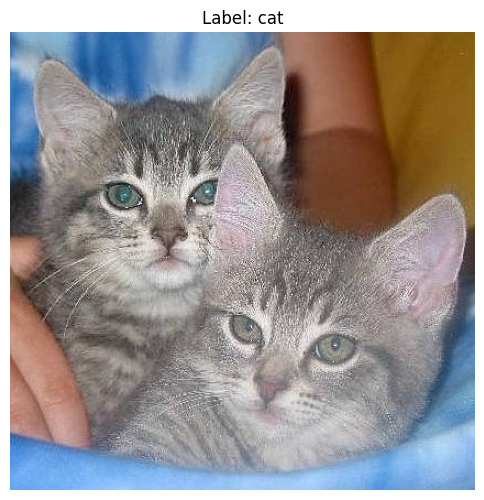

In [14]:
# Convert image color from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

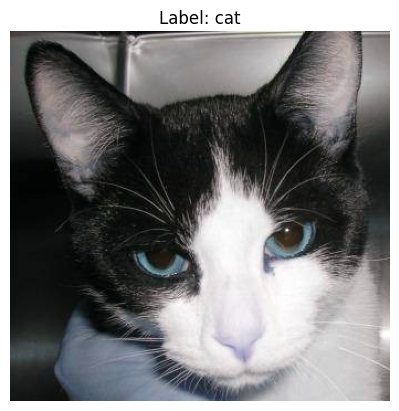

In [11]:
# if you plot img(BGR image), you will observe a difference in the color space 
plt.imshow(img)
plt.axis('off')
plt.title(f"Label: {label}")
plt.show()

# Image Processing


Here we will discuss the following:
 <ul>
            <li>Convert Image to GrayScale</li>
            <li>Resize the image</li>
            <li>Flatten Image </li>
            </ul>
    </li>


We will first start the process with a single image and then we will repeat the same for all images.

To perform KNN on the dataset, we will need to process the data. I will use the sample image(img_rgb) to explain each line of code.


### Convert image to GrayScale 


Convert image to grayscale - grayscale simplifies the algorithm and reduces computational requirements.


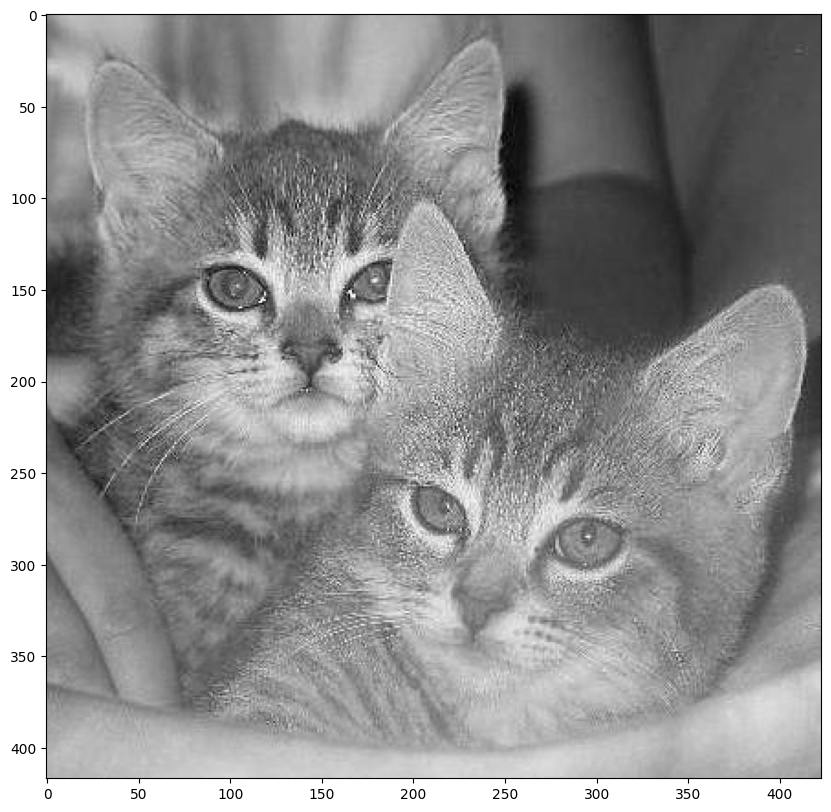

In [15]:
sample_image = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(sample_image, cmap = "gray")
plt.show()

### Resize image 

Resizing image helps the algorithm train faster.


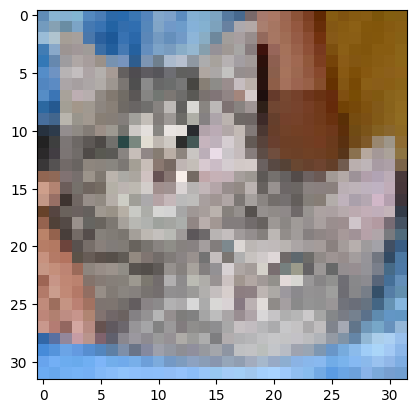

In [16]:
sample_image = cv2.resize(img_rgb, (32, 32))
plt.imshow(sample_image, cmap = "gray")
plt.show()

### Flatten image

Makes the image a numpy array for the algorithm to handle and recognize.


In [17]:
pixels = sample_image.flatten()
pixels

array([ 96, 140, 182, ..., 113, 159, 209], shape=(3072,), dtype=uint8)

### Repeat the Process Above for All Images


We will now repeat the same process above to load and process all the images you’ve annotated and label each picture. KNN is supervised machine learning algorithm, therefore we have to explicitly create labels for the machine.

Depending on how much data you have, this will take a while to run...


Load Annotations File: Which is already done so skip it


Prepare Image Paths and Label List


In [18]:
# Get all image file paths from the dataset folder
image_paths = list(paths.list_images(base_folder))

# Create empty lists to store image data and corresponding labels
train_images = []
train_labels = []

# Extract the list of class labels (e.g., ['dog', 'cat']) from the annotations
class_object = annotations['labels']


Process and Label Each Image


In [19]:
from tqdm import tqdm
# Process each image with a progress bar
for image_path in tqdm(image_paths, desc="Loading images"):
    filename = os.path.basename(image_path)

    # Skip if not in annotation
    if filename not in annotations["annotations"]:
        continue  # silently skip

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (32, 32))
    pixels = image.flatten()

    # Get label
    tmp_label = annotations["annotations"][filename][0]['label']
    label = class_object.index(tmp_label)

    # Append
    train_images.append(pixels)
    train_labels.append(label)


Loading images: 100%|██████████| 800/800 [00:37<00:00, 21.47it/s]


Create an array of the <code>train_images</code> and <code>train_labels</code>. <code>OpenCV</code> only identifies arrays of type <code>float32</code> for the training samples and array of shape <code>(label size, 1)</code> for the training labels. We can do that by specifying <code>astype('float32')</code> on the numpy array of the training samples and convert the training labels to integers and <code>reshape</code> the array to <code>(label size, 1)</code>. When you print the <code>train_labels</code>, the array will look like this <code>[[1], [0], ..., [0]]</code></p>


In [20]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

Reshape and Inspect Training Labels


In [21]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))
print("First 5 labels:\n", train_labels[:5])

First 5 labels:
 [[0]
 [0]
 [0]
 [1]
 [0]]


# Train a k-NN Classifier for Image Classification


Check the number of images and its label:


In [22]:
print(f"Number of images: {len(train_images)}")
print(f"Number of labels: {len(train_labels)}")


Number of images: 800
Number of labels: 800


Split data into training and test set with a test size of your choice:


In [23]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, stratify=train_labels,random_state=0)


To train the KNN model, we will use the <code>cv2.ml.KNearest_create()</code> from the <code>OpenCV</code> library. We need to define how many nearest neighbors will be used for classification as a hyper-parameter k. This parameter k can be toggled with/tuned in the training or model validation process. Fit the training and test images and get the accuracy score of the model.

We will try multiple values of <code>k</code> to find the optimal value for the dataset we have. <code>k</code> refers to the number of nearest neighbours to include in the majority of the voting process.

<i>Note:</i> Depending on how large your dataset is, it may take a few seconds to run.


In [24]:
# Record the start time to measure training duration
start_datetime = datetime.now()

# Create a KNN model using OpenCV's machine learning module
knn = cv2.ml.KNearest_create()

# Train the model using training samples and corresponding labels
# cv2.ml.ROW_SAMPLE specifies that each row in train_samples is a separate sample
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

# Define different values of K to evaluate
k_values = [1, 2, 3, 4, 5]
k_result = []  # To store the prediction results for each value of K

# Loop through each K value and test the model on test samples
for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(test_samples, k=k)
    k_result.append(result)  # Save the result for this value of K

# Flatten the result arrays for easier comparison later
flattened = []
for res in k_result:
    # Each `res` is a 2D array; flatten it into a 1D list
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

# Record end time and print how long training + prediction took
end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime - start_datetime))


Training Duration: 0:00:00.238855


We will get the accuracy value for each value of <code>k</code> i.e., how many percent of the images were classified correctly? We will create a confusion matrix for a more comprehensive classification model evaluation.


In [26]:
# Create empty lists to store accuracy results and confusion matrices for each K
accuracy_res = []
con_matrix = []

# Loop over the results for each value of K
for k_res in k_result:
    # Define the class labels (e.g., 0 = Cat, 1 = Dog)
    label_names = [0, 1]

    # Compute the confusion matrix for predictions vs. true labels
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)

    # Check which predictions match the true labels
    matches = k_res == test_labels

    # Count how many predictions were correct
    correct = np.count_nonzero(matches)

    # Calculate accuracy as a percentage
    accuracy = correct * 100.0 / result.size
    accuracy_res.append(accuracy)

# Store the accuracy for each value of K in a dictionary (key = K, value = accuracy)
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}

# Sort the results by K value to make them easier to read or plot
list_res = sorted(res_accuracy.items())


Accuracy


In [27]:
print("\nAccuracy per k:")
for k, acc in list_res:
    print(f"k = {k}: {acc:.2f}%")


Accuracy per k:
k = 1: 97.50%
k = 2: 97.50%
k = 3: 91.88%
k = 4: 85.62%
k = 5: 80.62%


**A Quick Guide to the Confusion Matrix**


A confusion matrix is a performance measurement for classification problem. It is a table with a combination of predicted and actual values. On the y-axis, we have the `True` label and on the x-axis we have the `Predicted` label. This example will focus on a binary classifier, i.e. a yes or no model.

<table>
  <tr>
    <td>&nbsp;</td>
    <td>Predicted: NO</td>
    <td>Predicted: YES</td>
  </tr>
  <tr>
    <td>True: NO</td>
    <td>30</td>
    <td>30</td>
  </tr>
  <tr>
    <td>True: YES</td>
    <td>10</td>
    <td>50</td>
  </tr>
</table>

In this matrix, we can see that there are two classes. For example, if we were predicting if an image is a hotdog, "yes" will be a hotdog and "no" will be not a hotdog. We have 120 predictions and out of those times, the classifier predicted "yes" 80 times and "no" 40 times but really, there were 60 "yes"s and 60 "no"s.

When we talk about confusion matrix, we talk about a few terms:
* True Positive (TP): Our model predicted "yes", and it was actually "yes"
* True Negative (TN): Our model predicted "no", and it was actually "no"
* False Positive (FP): Our model predicted "yes", but it was actually "no"
* False Negative (FN): Our model predicted "no", but it was actually "yes"

Let's look at it in the context of our example:

<table>
  <tr>
    <td>&nbsp;</td>
    <td>Predicted: NO</td>
    <td>Predicted: YES</td>
  </tr>
  <tr>
    <td>True: NO</td>
    <td>TN = 30</td>
    <td>FP = 30</td>
    <td>60</td>
  </tr>
  <tr>
    <td>True: YES</td>
    <td>FN = 10</td>
    <td>TP = 50</td>
    <td>60</td>
  </tr>
  <tr>
    <td>&nbsp;</td>
    <td>40</td>
    <td>80</td>
  </tr>
</table>

**Accuracy** is the number the model got right over the total number of predictions. This is (TP+TN)/Total Number of Oredictions.


Now let's visualize the confusion matrix:


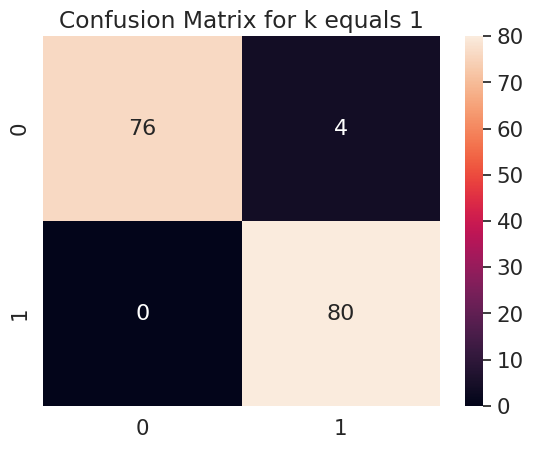

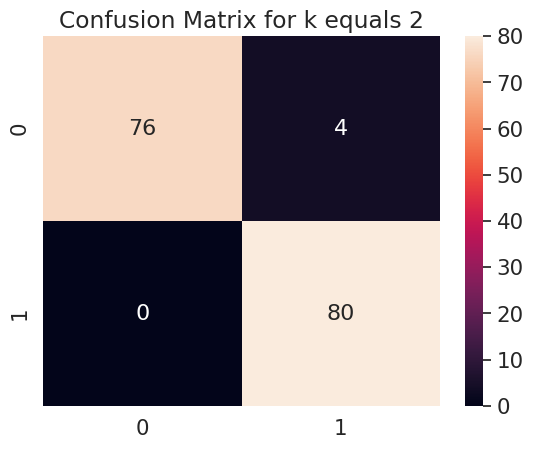

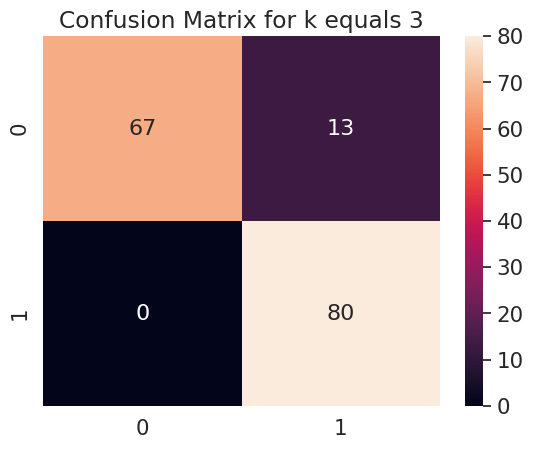

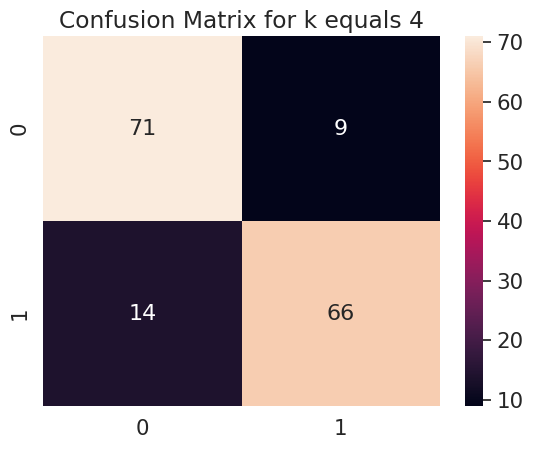

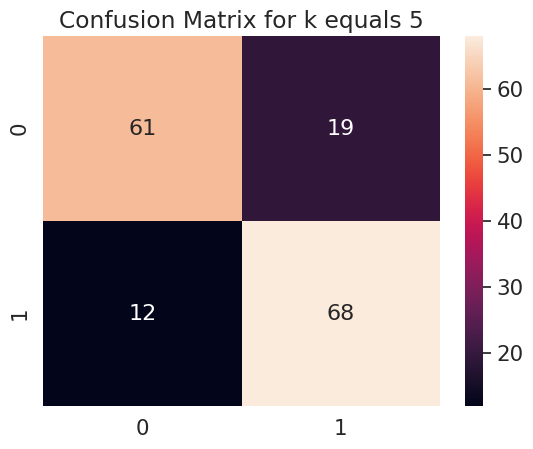

In [28]:
t = 0  # Initialize counter for k values

# Loop through each confusion matrix corresponding to different k values
for array in con_matrix:
    # Convert the confusion matrix array into a pandas DataFrame for better visualization
    df_cm = pd.DataFrame(array)
    
    # Set the font scale for better readability
    sns.set(font_scale=1.4)
    
    # Create the heatmap from the DataFrame
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt=".0f")  # fmt=".0f" ensures whole numbers are shown
    
    # Update k counter
    t += 1
    
    # Set the title for each confusion matrix plot
    title = "Confusion Matrix for k equals " + str(t)
    plt.title(title)
    
    # Show the plot
    plt.show()


We will plot the accuracy to see which one is highest i.e., what percentage of images were classified correctly?


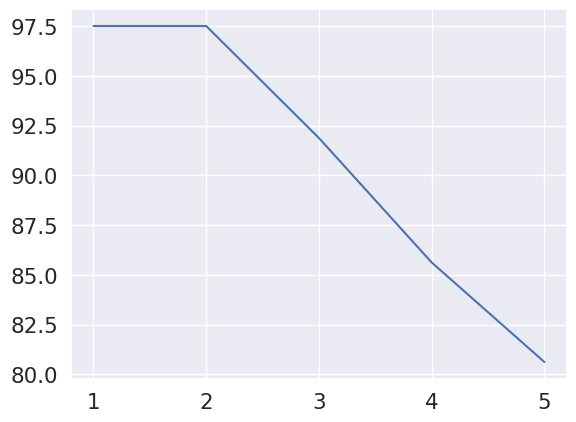

In [29]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

We will get the best value of <code>k</code> to train the model to test the model on our image:


In [30]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

1

Save the Trained kNN Model


In [31]:
knn.save('knn_samples.yml')

## Practice Exercise
### Test Our Model with an Uploaded Image


Upload your image, and see if it will be correctly classified.
<p><b>Instructions on How to Upload an Image:</b></p>
Use the upload button and upload an image from your local machine:
<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction.png" width="300"  />
</center>


The image will now be in the directory in which you are working in. To read the image in a new cell, use the <code>cv2.imread</code> and read its name. For example, I uploaded <code>anothercar.jpg</code> into my current working directory - <code>cv2.imread("anothercar.jpg")</code>.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction2.png" width="300"  />
</center>


Else use the below images to test.


In [32]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/A3xVgxTJVdrZTtBwGVbEIw/Cat.jpg"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/KZnFQiZj3e_sQKIyfvHvTA/dog.jpg"


--2026-01-12 19:49:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/A3xVgxTJVdrZTtBwGVbEIw/Cat.jpg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 188980 (185K) [image/jpeg]
Saving to: ‘Cat.jpg’

Cat.jpg             100%[===================>] 184.55K  --.-KB/s    in 0.003s  

2026-01-12 19:49:34 (52.3 MB/s) - ‘Cat.jpg’ saved [188980/188980]

--2026-01-12 19:49:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/KZnFQiZj3e_sQKIyfvHvTA/dog.jpg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-ob

Load the model


In [33]:
knn = cv2.ml.KNearest_create()
knn = knn.load('knn_samples.yml')


Replace your_uploaded_file below with the name of your image as seen in your directory. In case you are using the downloaded images given in the notebook then use as `Cat.jpg` or `dog.jpg`


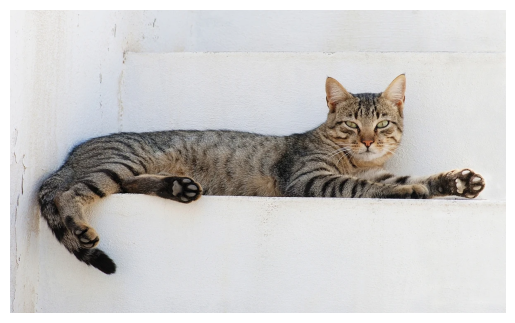

In [34]:
my_image = cv2.imread("Cat.jpg")
## let's see what the image looks like
image = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

Convert image to grayscale - grayscale simplifies the algorithm and reduces computational requirements.


In [35]:
my_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

Resize the image to reduce the size:


In [36]:
my_image = cv2.resize(my_image, (32, 32))

Flatten the image into a numpy array:


In [37]:
pixel_image = my_image.flatten()
pixel_image = np.array([pixel_image]).astype('float32')

Classify the image and print out the result of the model:


In [38]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=k_best)
print("Nearest Neighbours' Labels:\n", neighbours)
predicted_index = int(ret)
predicted_label = annotations['labels'][predicted_index]
print(f"Your image was classified as a **{predicted_label}**")


Nearest Neighbours' Labels:
 [[1.]]
Your image was classified as a **cat**


When we print out the neigbours, it tells you the k closest classes and uses a majority voting process to pick what your image may be classified as.


## Congratulations!

You've successfully completed a full image classification pipeline using the k-Nearest Neighbors (k-NN) algorithm and OpenCV! 


<h2>Authors</h2>


[Aije Egwaikhide](https://www.linkedin.com/in/aije-egwaikhide/)

[Sathya Priya](https://www.linkedin.com/in/sathya-priya-06120a17a/) 


<!--<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
        <tr>
        <td>2025-06-25</td>
        <td>1.3</td>
        <td>Sathya</td>
        <td>Created and Converted the lab to JupyterCurrent notebook</td>
    </tr>
    </tr>
        <tr>
        <td>2021-05-25</td>
        <td>1.2</td>
        <td>Kathy</td>
        <td>Modified multiple areas</td>
    </tr>
    <tr>
        <td>2021-05-25</td>
        <td>1.2</td>
        <td>Yasmine</td>
        <td>Modified multiple areas</td>
    </tr>
    <tr>
        <td>2021-04-10</td>
        <td>1.1</td>
        <td>Aije</td>
        <td>Fixed grammatical errors</td>
    </tr>
     <tr>
        <td>2021-04-09</td>
        <td>1.0</td>
        <td>Aije</td>
        <td>Updated to new template</td>
    </tr>
    <tr>
        <td>2021-02-24</td>
        <td>0.1</td>
        <td>Aije</td>
        <td>Created original version of the lab</td>
    </tr>
</table>-->


<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
